# 4.3 事後予測チェック

## インポート・設定

In [1]:
import dataclasses
import warnings
from numbers import Number

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import Markdown
from scipy import signal, special, stats

In [2]:
sns.set_theme()
warnings.simplefilter("ignore")
SEED = 0

観測データ

In [74]:
y_A = np.array([12, 9, 12, 14, 13, 13, 15, 8, 15, 6])

事後予測のためのデータセットを生成する。

In [5]:
@dataclasses.dataclass
class GammaDist:
    """ガンマ分布のパラメータを格納するクラス"""

    a: Number
    b: Number

    @property
    def rv(self):
        return stats.gamma(a=self.a, scale=1 / self.b)

    def sample(self, size) -> np.ndarray:
        return self.rv.rvs(size=size, random_state=SEED)


@dataclasses.dataclass
class PoissonDist:
    """ポアソン分布のパラメータを格納するクラス"""

    mu: Number

    @property
    def rv(self):
        return stats.poisson(self.mu)

    def sample(self, size) -> np.ndarray:
        return self.rv.rvs(size=size, random_state=SEED)

In [4]:
# 事後分布
posterior_A = GammaDist(a=237, b=20)
posterior_A

GammaDist(a=237, b=20)

In [59]:
# 1000個サンプリングする
n_samples = 1000
theta = posterior_A.sample(size=n_samples)

# 5個見てみる
theta[:5]

array([13.24276562, 12.14381022, 13.32877017, 11.09741795, 11.75411496])

In [63]:
# サンプルサイズ10のサンプルを1000個生成する
sample_size = 10
dataset = PoissonDist(
    theta.reshape(n_samples, 1),
).sample(
    size=(n_samples, sample_size),
)


# 1個目のサンプルを見てみる
print("theta:\t", theta[0])
print("sample:\t", dataset[0])

theta:	 13.24276561619596
sample:	 [14 14 12 12 23 17  6 13  8 13]


## a

$t^{(s)}$ を計算する

In [70]:
# 各サンプルに対して、平均/標準偏差を計算する
t = dataset.mean(axis=1) / dataset.std(axis=1)
print("size:\t", t.shape)

# 5個見てみる
t[:5]

size:	 (1000,)


array([3.        , 4.37314282, 4.36132852, 3.66243195, 6.5       ])

観測データの$t$を計算する

In [75]:
# 観測データのt
t_obs = t.mean() / t.std()
t_obs

3.516123854601306

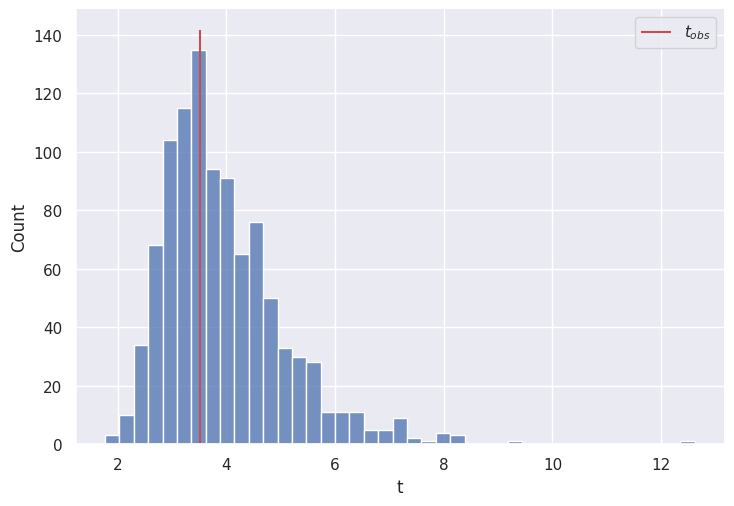

In [84]:
sns.displot(
    x=t,
    aspect=1.5,
).set(xlabel="t")
plt.vlines(t_obs, *plt.gca().get_ylim(), colors="r", label="$t_{obs}$")
plt.legend()